Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **48 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Adaobi Amannae"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Hiring problem and random variables

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1 [time estimate: 5 minutes]
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [11]:
def hire_assistant(applicants):
    """
    This function should output the number of assistants hired.
    
    Parameters
    ----------
    applicants : list
        A list of the numbers that represent the level of qualification of 
        the applicants; the higher the number, the better qualified.
        
    Returns
    -------
    hires : int
        Number of assistants hired.
    
    """
    #initalize the dummy variable 
    best = 0
    
    #initialize the counter for the number of hires
    hire =0
    #when no new hire is made, we have just 1 hire for the current assistant
    cur_hire =1
    
    #loop through the applicants and check if the new one is better than the incumbent
    for i in applicants:
        #if it is, then hire the new assistant
        if i>best:
            best =i
        #increase the number of hires by 1
            hire+=1
#return the number of hires or current hire, when no new hiring is done
#to do this, we take the largest of the hire and cur_hire
    return max(hire,cur_hire)
            
#test cases
print(hire_assistant([1]))
print(hire_assistant([-1, -2, -3, -4]))
print(hire_assistant([0, 2, 3, 4]))

1
1
3


In [12]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2 [time estimate: 5 minutes]

Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [19]:
import random
def experimental_hires(N):
    # Initialize a holder for the total hire number
    sum_N = 0
#simulate over a number of times and generate a random order of lists of applicants
    for i in range(1000):    
        applicants = random.choices(range(-100,100),k = N)

      # call the previous function to find the number of hires and add to the sum 
        sum_N += hire_assistant(applicants)

    # find the average by dividing by the number of simulation
    return sum_N/1000
 
#Test cases    
print(experimental_hires(12))
print(experimental_hires(20))



2.374
2.843


## Question 3 [time estimtate: 10 minutes]

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [22]:
def analytical_hires(N):
    """
    This function returns the analytical expected number of
    hires if there are N applicants
    
    Parameters
    ----------
    N : int
        Number of applicants
        
    Returns
    -------
    hires : float
        Average number of assistants hired
    
    Note
    ----
    From the textbook, we know that the analytical result is
    
        1 + 1/2 + 1/3 + ... + 1/N
        
    """
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

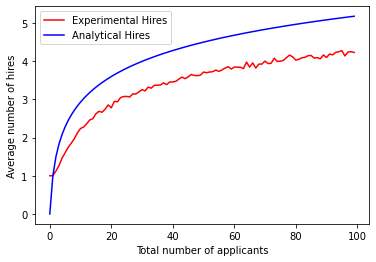

In [25]:
#import the necessary function to plot
import matplotlib.pyplot as plt
%matplotlib inline


# initialize 2 empty lists to hold the experimental and analytical hire 
Analytical_list = []
Experimental_list = []

# run simulations for n number of hires and add to the lists created above 
for n in range(100):
    Experimental_list.append(experimental_hires(n))
    Analytical_list.append(analytical_hires(n))

    #plot two line plots to accommodate the 2 lists
plt.plot(range(100), Experimental_list, color='r')
plt.plot(range(100), Analytical_list, color='b')
#Always label your axis
plt.ylabel('Average number of hires') 
plt.xlabel('Total number of applicants') 

#add a legend for ease of interpretation
plt.legend(('Experimental Hires', 'Analytical Hires'))
#visualize the graph
plt.show()


## Question 4 [time estimate: 10 minutes]

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

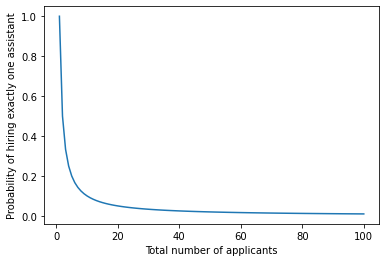

In [30]:
#import the necessary library
import matplotlib.pyplot as plt
%matplotlib inline
#create an empty list to hold the x and y varaibles
x = []
y = []
#let x hold the total number of applicants within the specified range
for i in range(1,101):
    x.append(i)
#let y be the probability of hiring 1 assitant for every given range
for i in range(100):
    y.append(1/x[i])

plt.plot(x, y)
plt.xlabel('Total number of applicants')
plt.ylabel('Probability of hiring exactly one assistant')
plt.show()


## [Optional] Question 5 [time estimate: 15 minutes]
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1 [time estimate: 3 minutes]
Knowing that everyone’s hats are unique and every guest has a hat, do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

I don't think so, in the random assistant problem, we introduced randomization because we do not know the order that each candidate is interviewed. But in this case, the order does not really matter, the goal is to get the right hat to the right person so we do not need to randomized again.

## Question 2 [time estimate: 3 minutes]

Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants
```
**Command 1.**
```
hat_list = [np.random.integers(0,n) for i in range(n)]
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

In [34]:
import numpy as np
n = 100
#command 2
hat_list_1 = list(range(n)) 
np.random.shuffle(hat_list_1)
print(hat_list_1)
#command 3
hat_list = np.random.sample(n)
print(hat_list)

[49, 99, 80, 84, 38, 71, 64, 10, 16, 57, 53, 83, 94, 95, 41, 76, 85, 42, 28, 33, 34, 21, 0, 9, 35, 44, 97, 12, 45, 15, 17, 19, 3, 50, 58, 24, 20, 91, 40, 7, 36, 82, 22, 79, 78, 14, 27, 55, 67, 32, 62, 5, 73, 43, 39, 6, 13, 92, 48, 77, 75, 69, 88, 89, 93, 23, 98, 11, 31, 87, 96, 63, 52, 30, 68, 26, 60, 86, 51, 25, 72, 70, 66, 90, 74, 61, 29, 18, 47, 54, 59, 37, 81, 8, 4, 2, 65, 1, 56, 46]
[0.76554891 0.68007148 0.99207547 0.65351306 0.77166194 0.18958564
 0.43413284 0.99498608 0.76675282 0.79497684 0.49075045 0.89404925
 0.78855416 0.95888289 0.21839269 0.78294139 0.11026397 0.65733768
 0.35734323 0.86526713 0.2934138  0.53041909 0.47514034 0.3781923
 0.98593044 0.75109953 0.3557449  0.83407816 0.20084005 0.24837506
 0.38540929 0.540028   0.42877867 0.25020389 0.14815247 0.22970263
 0.5997378  0.75207997 0.95012712 0.76053584 0.59069059 0.47478943
 0.91532788 0.66761722 0.70049625 0.92648583 0.00562175 0.37246282
 0.5532479  0.35762963 0.58933832 0.77198588 0.93571889 0.64548947
 0.0721

From the implementations above, we see that command 1 has a syntax error, so it is ruled out.

command 2 generates a list of integers, then shuffles them to give a randomized list.
commad 3 only outputs decimals which are not fitting for this context.

Hence, command 2 is the pythonic way to go.

## Question 3 [time estimate: 5 minutes]

Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [49]:
#import the necessary library
import numpy as np
def hat_check(N):
    
#create a list to represent the original ordered hats
    ordered_hats =  list(range(N))
#shuffle the list to compare the number assigned correctly randomly
    np.random.shuffle(ordered_hats)
    #initialize a counter for the number of correctly assigned hat
    count = 0
#loop through the number of elements, and check for correct pairing 
    for i in range(N):
        if (ordered_hats[i] ==i):
    #return the number rightly paired
            count += 1
    return count

#test case
print(hat_check(50))
print(hat_check(55))
print(hat_check(900))


1
0
1


## Question 4 [time estimate: 7 minutes]

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

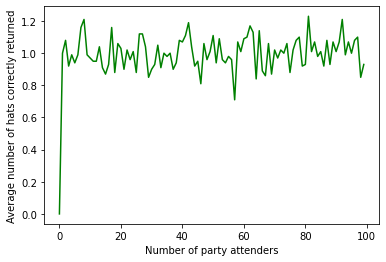

In [51]:
#first write a function to calculate the average hat got right
def average_hat_check(N):
    """
    Returns the average number of hats correctly assigned to the rightful owner
    
    Inputs:
    - N: Number of party attendants
    Outputs:
    - Average Number of hats correctly returned 
    """   

    # initialize a holder for the sum
    sum_h = 0
# iterate for a number of times and return the average return the average correctly returned hat number
    for i in range(100):
        sum_h += hat_check(N)

    return sum_h/100


# create an empty list for storing the average number of hats correctly returned
correct_hat = []

# iterate over a number of times and append the average into the new list
for x in range(100):
    correct_hat.append(average_hat_check(x))
#create a plot to represent the behavior of the simulations with increasing number of variables
plt.plot(range(100), correct_hat, color='g') 
#always label your axis
plt.ylabel('Average number of hats correctly returned')
plt.xlabel('Number of party attenders')
plt.show()


#raise NotImplementedError()

## [Optional] Question 5 [time estimate: 15 minutes]

As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

YOUR ANSWER HERE